In [1]:
! pip install opencv-python

# Step 1

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize

In [3]:
def create_folders(src, labels):
    os.makedirs(src, exist_ok=True)
    for i in labels:
        out = os.path.join(src, i)
        os.makedirs(out, exist_ok=True)

# Step 2 Image Resizing

In [4]:
def resizing_images(dataset, output_path):
    IMG_SIZE = (223, 223)
    for label, path in zip(dataset['labels'], dataset['paths']):
        class_path = os.path.join(output_path, label)

        image = cv2.imread(path)

        if image.shape != IMG_SIZE: # Verify the image is uniformed
            image = cv2.resize(image, IMG_SIZE)

        # Slice the string for filename
        start = path.rfind('\\')  # Windows path separator
        end = path.rfind ('.')  # Before the extension

        filename = path[start + 1 : end] + ".jpg"
        out = os.path.join(output_path, label, filename)
        cv2.imwrite(out, image)
        print(f"Saved preprocess image {out}\n")

# Step 3: Create a Pre-process using HOGDescriptor() also include grayscale before applying HOGDescriptor().

In [5]:
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    features = hog.compute(gray)
    return features.flatten()

# Step 4:  Create a function that loads an image from set directory.

In [6]:
def load_images_from_directory(src):
    """
    Step 4 Load Images from directory
    """
    dataset = dict()
    dataset['labels'] = [] 
    dataset['images'] = []
    dataset['paths'] = []

    # Read the specified  datasets of images in each subfolder with
    # their respective labels
    for root, subdir, files in os.walk(src):
        for class_name in subdir: 
            class_dir = os.path.join(root, class_name) 
            for filename in os.listdir(class_dir): 
                img_path = os.path.join(class_dir, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    dataset['images'].append(image)
                    dataset['labels'].append(class_name)
                    dataset['paths'].append(img_path)   
    return dataset

# Step 5: Create a Visualization function for class distribution

In [7]:
def visualize_class_distribution(labels, class_names):
    class_counts = {class_name: labels.count(class_name) for class_name in set(class_names)}
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()
    total_samples = sum(class_counts.values())
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f'{class_name}: {count} samples ({percentage:.2f}%)')

# Step 6: Declare Directory path

In [8]:
path = r"C:\Users\TEMP.LAB.013\Downloads\Tree"

# Step 7 : Declare images, labels, class_names using the load image function.

In [9]:
dataset = load_images_from_directory(path) # Loading Images from directory

In [10]:
output_path = r'.\output' # 
create_folders(output_path, dataset['labels']) # Creating the Folders for resize images
rsdataset = resizing_images(dataset, output_path)

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-54 (2).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-54 (3).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-54.jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-55 (2).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-55 (3).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-55 (4).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-55 (5).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-55 (6).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-55 (7).jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-55.jpg

Saved preprocess image .\output\2nd Tree\photo_2024-03-21_08-32-56.jpg

Saved preprocess image .\output\3rd Tree\photo_2024-03-21_08-33-11.jpg

Saved preprocess image .\output\3rd Tree\photo_2024-03-21_08-33-12 (2).jpg

Saved preprocess image .\out

In [11]:
dataset = load_images_from_directory(output_path) # Loading Resize Images from directory

In [12]:
# The size of image in dataset
dataset['images'][0].shape

(223, 223, 3)

# Step 8 : Use the Class visualization function

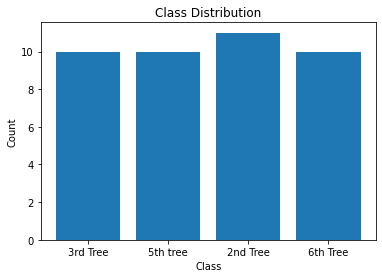

3rd Tree: 10 samples (24.39%)
5th tree: 10 samples (24.39%)
2nd Tree: 11 samples (26.83%)
6th Tree: 10 samples (24.39%)


In [13]:
# Visualize The Dataset
visualize_class_distribution(dataset['labels'], dataset['labels'])

# Step 9 : Use the extract feature extraction function.

In [14]:
features = np.array([extract_features(img) for img in dataset['images']])

In [15]:
X_train,X_test,y_train, y_test = train_test_split(features, dataset['labels'], test_size = 0.2, random_state=42) # Step 10

In [16]:
# Step 11: Declare the SVM and Random forest Classifier.
svm_classifier = SVC(kernel='linear')

In [17]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Step 12: Fit the models on the declared variables for SVM and Random forest Classifier.
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred_svm = svm_classifier.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

# Step 12: Fit the models on the declared variables for SVM and Random forest Classifier.

In [20]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM accuracy score:", accuracy_svm * 100)

SVM accuracy score: 44.44444444444444


In [21]:
accuracy_rf = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.5555555555555556


# Step 14: Create some model testing include some individual testing.

In [22]:
input_image = cv2.imread('istock.jpg', cv2.COLOR_BGR2GRAY)
input_label = '2nd Tree'
input_image = cv2.resize(input_image, (223, 223))
if input_image is not None:
    input_features = extract_features(input_image).reshape(1,-1)
    svm_pred = svm_classifier.predict(input_features)[0]
    rfc_pred = rfc.predict(input_features)[0]
    # Display the input image
    print("SVM PRED:", svm_pred)
    print("RFC PRED:", rfc_pred)
    print("GROUND TRUTH:", input_label)
else:
    print("Error unable to read input image")

SVM PRED: 3rd Tree
RFC PRED: 3rd Tree
GROUND TRUTH: 2nd Tree
